In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Downloads/netflix_titles.csv/netflix_titles.csv")

In [4]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
dataset.shape

(7787, 12)

In [7]:
for column in dataset:
    print(column)
    print(dataset[column].isnull().sum())

show_id
0
type
0
title
0
director
2389
cast
718
country
507
date_added
10
release_year
0
rating
7
duration
0
listed_in
0
description
0


In [8]:
#replace blank column with 'unknown'
dataset = dataset.fillna('Unknown')

In [9]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
rating = dataset['rating'].value_counts()
print(rating)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


Text(0.5, 1.0, 'Count of movie and tv show')

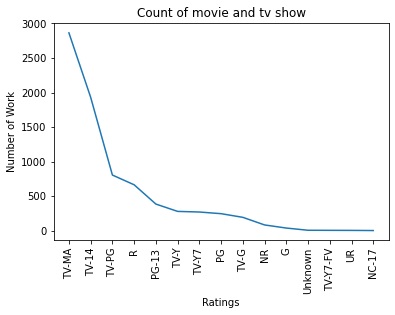

In [11]:
plt.plot(rating)
plt.xticks(rotation=90)
plt.xlabel('Ratings')
plt.ylabel('Number of Work')
plt.title('Count of movie and tv show')

In [12]:
#split listed_in
genre = dataset['listed_in']
genre.shape, dataset.shape

((7787,), (7787, 12))

In [13]:
for i in range(0, len(genre)-1):
    temp = genre[i].split()
    genre[i] = temp[0]

<ipython-input-13-08bfc8fb92e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre[i] = temp[0]


In [14]:
dataset['listed_in'] = dataset['listed_in'].map(lambda x: x.lstrip('.,'))
dataset['listed_in'] = dataset['listed_in'].map(lambda x: x.rstrip('.,'))

In [15]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [16]:
values = dataset['listed_in'].value_counts()
print(values)

Dramas                             1384
Comedies                           1074
International                       804
Documentaries                       750
Action                              721
Children                            502
Crime                               369
Kids'                               359
Stand-Up                            354
Horror                              244
TV                                  232
British                             232
Docuseries                          194
Anime                               167
Reality                             102
Classic                              98
Movies                               56
Thrillers                            49
Romantic                             31
Independent                          20
Music                                17
Cult                                 12
Sci-Fi                               11
Spanish-Language                      2
Documentaries, Music & Musicals       1


Text(0.5, 1.0, 'Genre of movie and tv show')

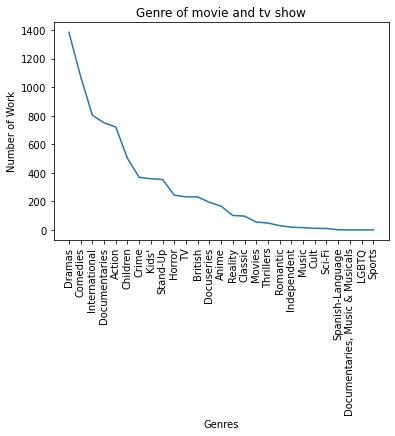

In [17]:
plt.plot(values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('Genre of movie and tv show')

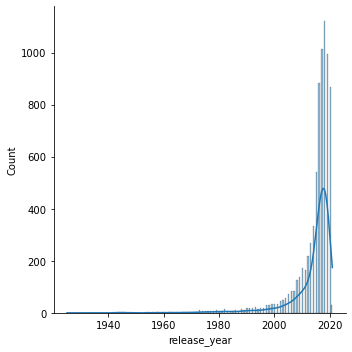

In [18]:
#overall movie and tv show production happening across the years
sns.displot(dataset['release_year'], kde = True)

In [19]:
movie = dataset.loc[dataset['type'] == 'Movie']
tv = dataset.loc[dataset['type'] == 'TV Show']

C:\Users\Windows10\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows10\anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


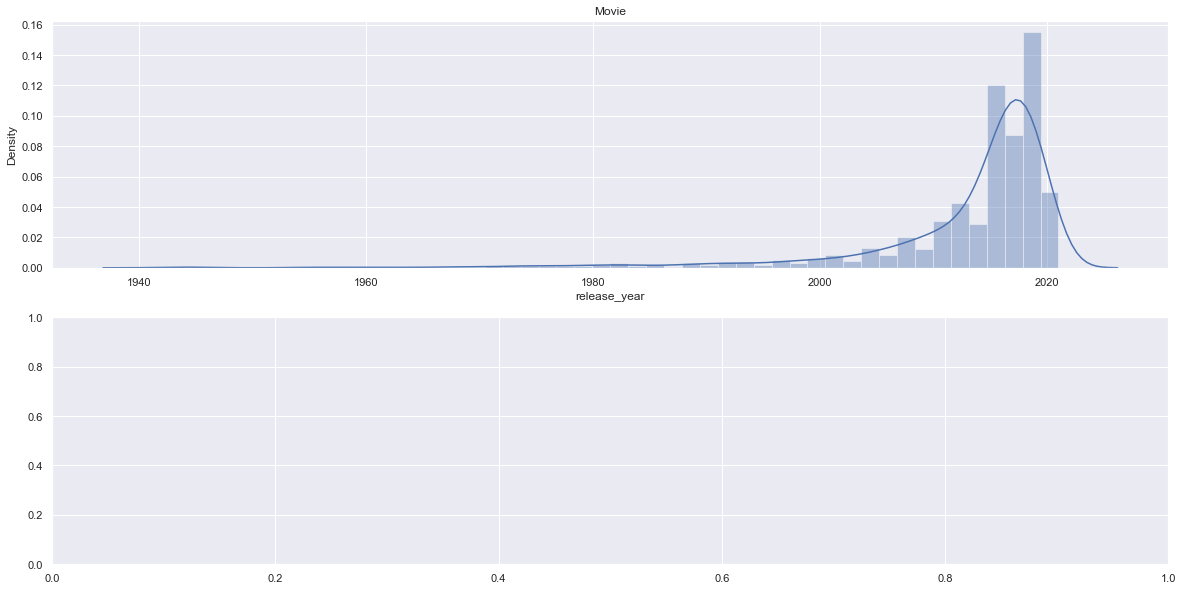

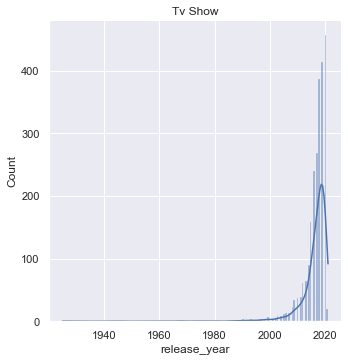

In [20]:
sns.set(rc = {'figure.figsize': (20,10)})
f, axes = plt.subplots(2, 1)
sns.distplot(movie['release_year'], kde = True, ax = axes[0]).set(title = 'Movie')
sns.displot(tv['release_year'], kde = True, ax = axes[0]).set(title = 'Tv Show')

In [21]:
country = dataset['country']
print(country)

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                              Unknown
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object


In [22]:
country = country.sort_values()
country = country.reset_index(drop = True)

In [23]:
country.unique()

array(['Argentina', 'Argentina, Brazil, France, Poland, Germany, Denmark',
       'Argentina, Chile', 'Argentina, Chile, Peru', 'Argentina, France',
       'Argentina, France, United States, Germany, Qatar',
       'Argentina, Italy', 'Argentina, Spain', 'Argentina, United States',
       'Argentina, United States, Mexico', 'Argentina, Uruguay, Serbia',
       'Argentina, Uruguay, Spain, France', 'Australia',
       'Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay',
       'Australia, Canada', 'Australia, France',
       'Australia, France, Ireland', 'Australia, India',
       'Australia, Iraq', 'Australia, New Zealand',
       'Australia, New Zealand, United States',
       'Australia, United Arab Emirates', 'Australia, United Kingdom',
       'Australia, United Kingdom, Canada',
       'Australia, United Kingdom, United Arab Emirates, Canada',
       'Australia, United Kingdom, United States, New Zealand, Ita

In [24]:
#Afrika
south_africa = dataset.loc[dataset['country'] == 'South Africa']
algeria = dataset.loc[dataset['country'] == 'Algeria']
sudan = dataset.loc[dataset['country'] == 'Sudan']
angola =  dataset.loc[dataset['country'] == 'Angola']

#Asia
turkey = dataset.loc[dataset['country'] == 'Turkey']
japan = dataset.loc[dataset['country'] == 'Japan']
russia = dataset.loc[dataset['country'] == 'Russia']
china = dataset.loc[dataset['country'] == 'China']
india = dataset.loc[dataset['country'] == 'India']
arab_emirates = dataset.loc[dataset['country'] == 'United Arab Emirates']
jordan = dataset.loc[dataset['country'] == 'Jordan']

#Australia
aust = dataset.loc[dataset['country'] == 'Australia']
new_zealand = dataset.loc[dataset['country'] == 'New Zealand']

#Eropa
france = dataset.loc[dataset['country'] == 'France']
italy = dataset.loc[dataset['country'] == 'Italy']
uk = dataset.loc[dataset['country'] == 'United Kingdom']
poland = dataset.loc[dataset['country'] == 'Poland']
spain = dataset.loc[dataset['country'] == 'Spain']
portugal = dataset.loc[dataset['country'] == 'Portugal']
germany = dataset.loc[dataset['country'] == 'Germany']
sweden = dataset.loc[dataset['country'] == 'Sweden']

#Nort Amerika
us = dataset.loc[dataset['country'] == 'United States']
canada = dataset.loc[dataset['country'] == 'Canada']
mexico = dataset.loc[dataset['country'] == 'Mexico']

#South Amerika
brazil = dataset.loc[dataset['country'] == 'Brazil']
argentina = dataset.loc[dataset['country'] == 'Argentina']
paraguay = dataset.loc[dataset['country'] == 'Paraguay']
peru = dataset.loc[dataset['country'] == 'Peru']
uruguay = dataset.loc[dataset['country'] == 'Uruguay']


In [25]:
africa = pd.concat([south_africa, algeria, sudan, angola])
asia = pd.concat([turkey, japan, russia, china, india, arab_emirates, jordan])
australia = pd.concat([aust, new_zealand])
europe = pd.concat([france, italy, uk, poland, spain, portugal, germany, sweden])
north_america = pd.concat([us, canada, mexico])
south_america = pd.concat([brazil, argentina, paraguay, peru, uruguay])

Text(0.5, 1.0, 'Afrika')

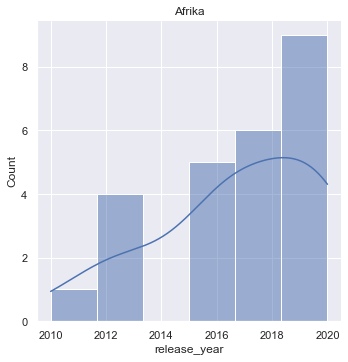

In [29]:
sns.set(rc = {'figure.figsize': (8,3)})
sns.displot(africa['release_year'], kde = True)
plt.title('Afrika')

Text(0.5, 1.0, 'Asia')

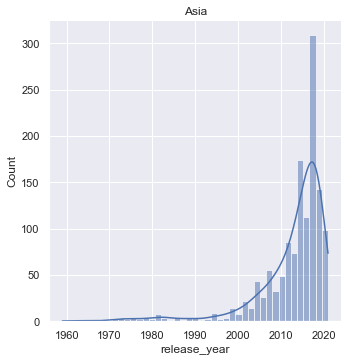

In [37]:
sns.displot(asia['release_year'], kde = True)
plt.title('Asia')

Text(0.5, 1.0, 'Australia')

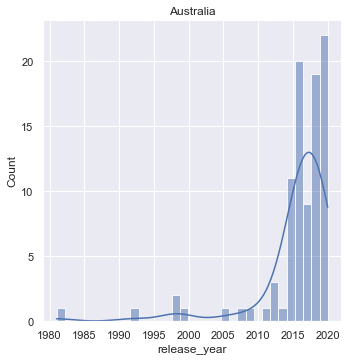

In [36]:
sns.displot(australia['release_year'], kde = True)
plt.title('Australia')

Text(0.5, 1.0, 'Europe')

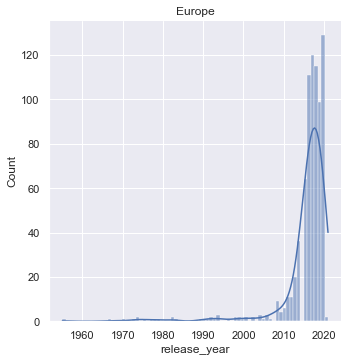

In [35]:
sns.displot(europe['release_year'], kde = True)
plt.title('Europe')

Text(0.5, 1.0, 'North America')

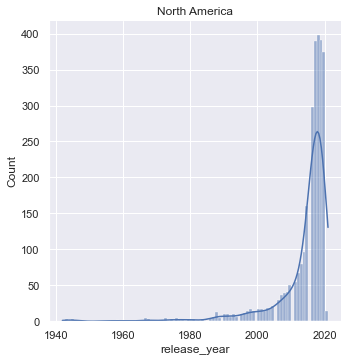

In [38]:
sns.displot(north_america['release_year'], kde = True)
plt.title('North America')

Text(0.5, 1.0, 'South America')

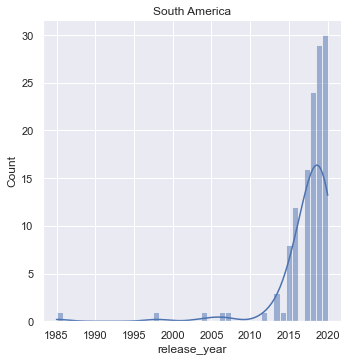

In [39]:
sns.displot(south_america['release_year'], kde = True)
plt.title('South America')

In [40]:
africa_val = africa['listed_in'].value_counts()
asia_val = asia['listed_in'].value_counts()
australia_val = australia['listed_in'].value_counts()
europe_val = europe['listed_in'].value_counts()
north_america_val = north_america['listed_in'].value_counts()
south_america_val = south_america['listed_in'].value_counts()

Text(0.5, 1.0, 'Africa')

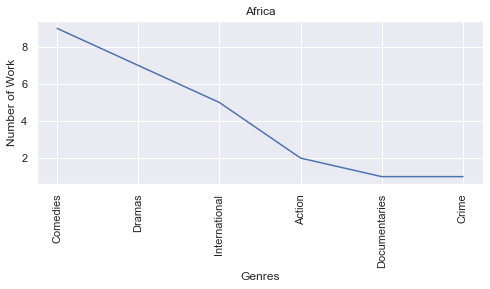

In [41]:
plt.plot(africa_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('Africa')

Text(0.5, 1.0, 'Asia')

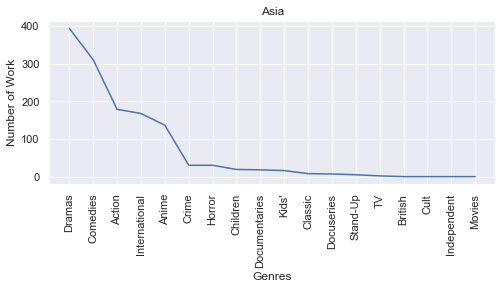

In [42]:
plt.plot(asia_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('Asia')

Text(0.5, 1.0, 'Australia')

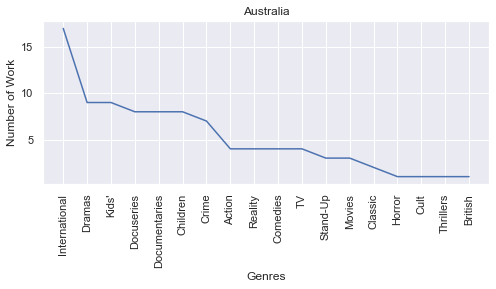

In [43]:
plt.plot(australia_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('Australia')

Text(0.5, 1.0, 'Europe')

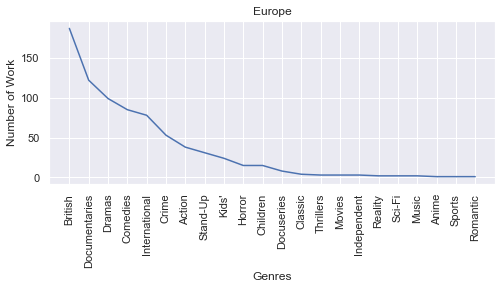

In [44]:
plt.plot(europe_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('Europe')

Text(0.5, 1.0, 'North America')

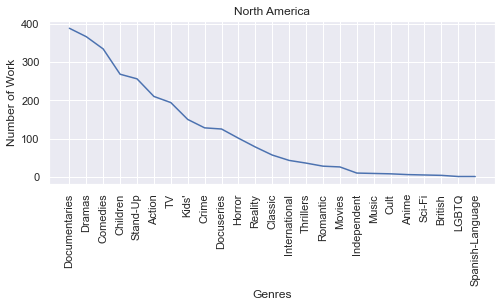

In [45]:
plt.plot(north_america_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('North America')

Text(0.5, 1.0, 'South America')

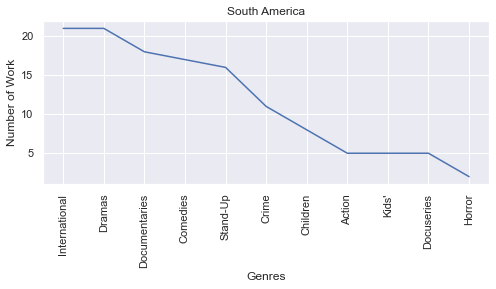

In [46]:
plt.plot(south_america_val)
plt.xticks(rotation = 90)
plt.xlabel('Genres')
plt.ylabel('Number of Work')
plt.title('South America')

In [51]:
#another visualization
from wordcloud import WordCloud

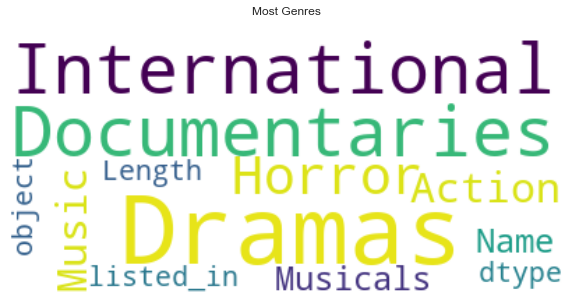

In [52]:
wc = WordCloud(background_color = 'white', max_words = 500)
fig = plt.figure(figsize = (10,6))
wc.generate(str(dataset['listed_in']))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Most Genres')
plt.axis('off')
plt.show()

#### conclusion
Africa mostly enjoys comedies. <br>
Australia enjoys international shows and/or movies. <br>
In europe, british productions are very popular. <br>
North America is very into documentaries. <br>
Rest follows the worlds trend: Dramas. <br>